# EDA

## IMPORTAR PAQUETES

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from toolbox_DS import *

## IMPORTAR LOS DATOS

Ruta del proyecto.

In [95]:
ruta_proyecto = 'C:/Users/Alfonso/OneDrive/Documentos_/Formación/Bootcamp_DS/Repo_DS/Proyect_Break_ML/Proyecto_ML/00_PROYECTO_ML'

Nombres de los ficheros de datos.

In [96]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Carga de datos.

In [97]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA UNIVARIABLE CATEGÓRICAS

### Análisis estadístico

In [98]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [99]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
1,education,Basic,0.024308
0,education,2n Cycle,0.092505
3,education,Master,0.157326
4,education,PhD,0.217421
2,education,Graduation,0.508440
7,marital_status,OTROS,0.004051
10,marital_status,Widow,0.031735
5,marital_status,Divorced,0.101283
8,marital_status,Single,0.211344
9,marital_status,Together,0.258609


### Análisis gráfico

In [100]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

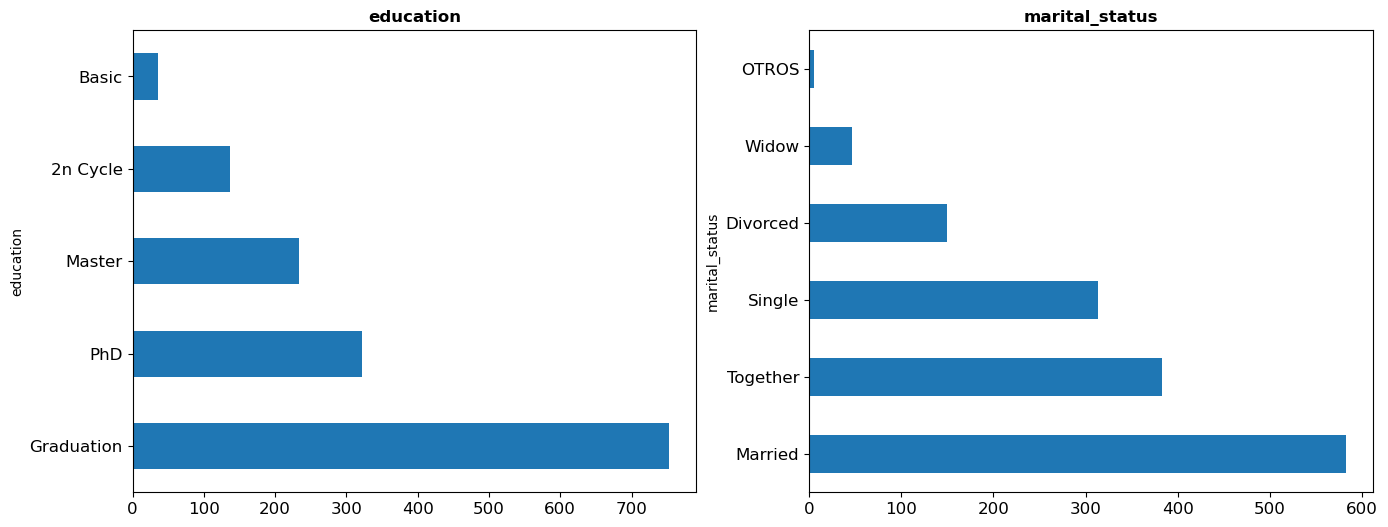

In [101]:
graficos_eda_categoricos(cat)

## EDA UNIVARIABLE NUMÉRICAS

### Análisis estadístico

In [102]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [103]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
year_birth,1481.0,1969.081702,1970.0,11.736727,1945.0,1959.0,1970.0,1978.0,1994.0
income,1481.0,51570.927346,51012.0,20937.919821,7500.0,34961.0,51012.0,67506.0,110428.8
kidhome,1481.0,0.461175,0.0,0.539029,0.0,0.0,0.0,1.0,2.0
teenhome,1481.0,0.499662,0.0,0.545405,0.0,0.0,0.0,1.0,2.0
recency,1481.0,48.339635,49.0,28.896228,0.0,23.0,49.0,73.0,99.0
mntwines,1481.0,298.419311,163.0,338.462574,1.0,22.0,163.0,493.0,1388.0
mntfruits,1481.0,26.252532,8.0,39.681498,0.0,1.0,8.0,33.0,180.0
mntmeatproducts,1481.0,167.819716,64.0,224.498478,2.0,15.0,64.0,231.0,965.0
mntfishproducts,1481.0,37.183660,12.0,54.096548,0.0,3.0,12.0,49.0,240.0
mntsweetproducts,1481.0,26.929102,8.0,40.725992,0.0,1.0,8.0,34.0,191.0


### Análisis gráfico

In [104]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

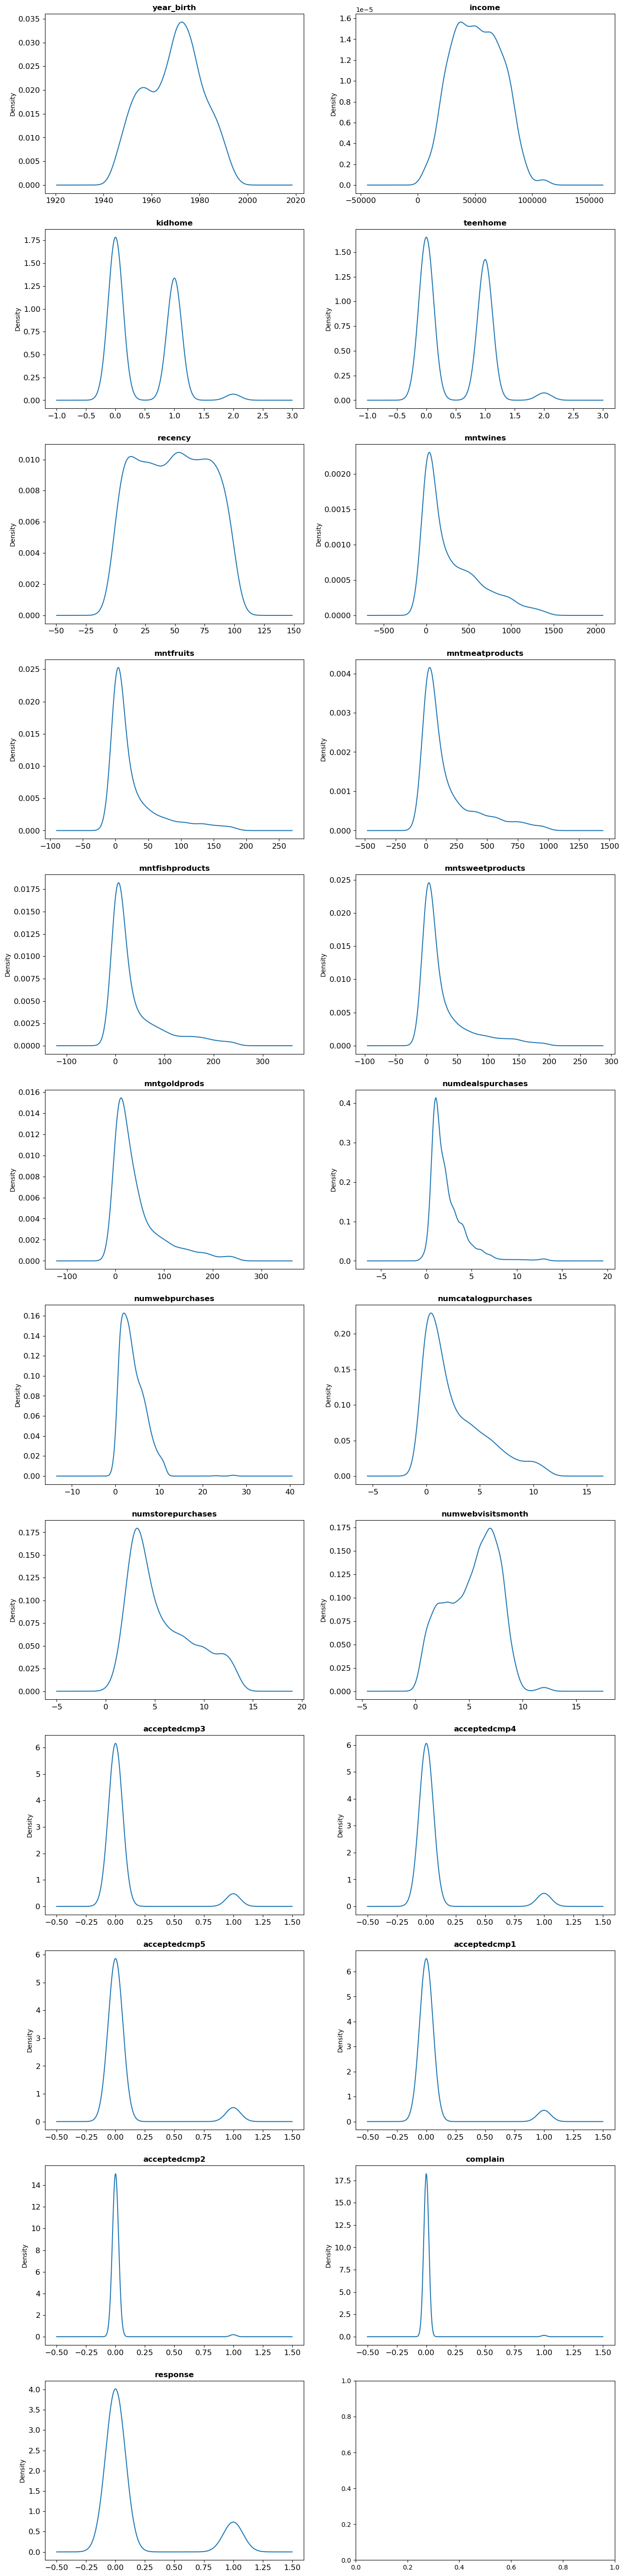

In [105]:
graficos_eda_continuas(num)

## EDA BIVARIABLE CATEGÓRICAS

In [106]:
cat_copy = cat.copy()
cat_copy['response_cat'] = num['response'].astype('category')
cat_copy

,education,marital_status,response_cat
ID,,,
1640,Graduation,Divorced,0
977,Graduation,Together,0
10150,Graduation,Single,1
8181,2n Cycle,Single,0
1399,Graduation,Married,0
...,...,...,...
7999,PhD,Together,1
4548,Graduation,Single,0
10785,Graduation,Married,0


In [107]:
target = 'response_cat'
cat.columns

Index(['education', 'marital_status'], dtype='object')

Análisis de education vs response_cat
****************************************


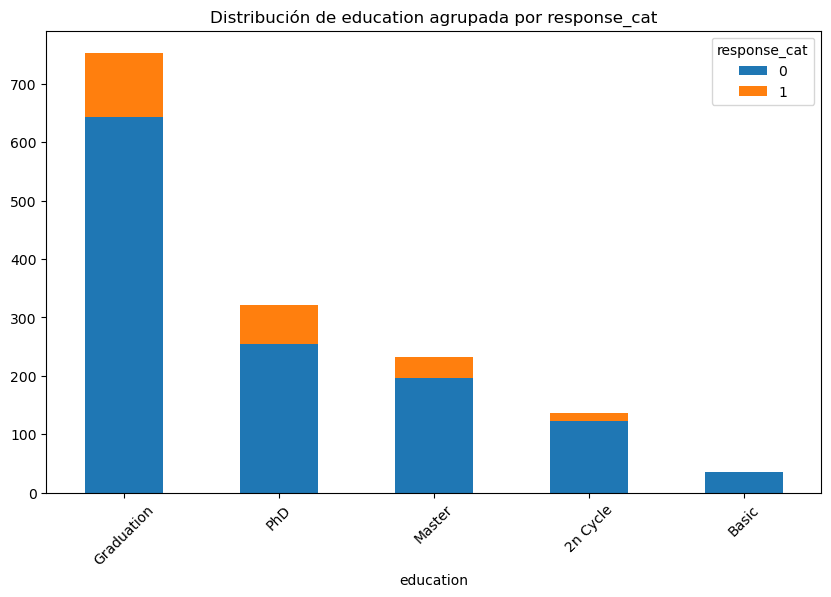

Tabla de contingencia de education vs response_cat:
response_cat    0    1
education             
Graduation    643  110
PhD           254   68
Master        197   36
2n Cycle      123   14
Basic          35    1

Tabla de porcentajes de education respecto a response_cat:
response_cat          0          1
education                         
Graduation    51.357827  48.034934
PhD           20.287540  29.694323
Master        15.734824  15.720524
2n Cycle       9.824281   6.113537
Basic          2.795527   0.436681

Tabla de frecuencias para education:
            Frecuencia Absoluta  Frecuencia Relativa (%)
education                                               
Graduation                  753                50.844024
PhD                         322                21.742066
Master                      233                15.732613
2n Cycle                    137                 9.250506
Basic                        36                 2.430790

Análisis de marital_status vs response_cat
*

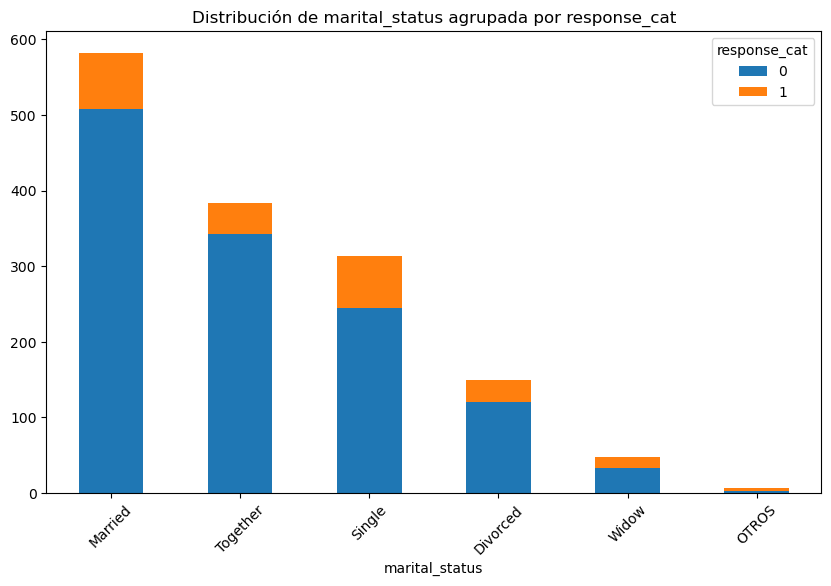

Tabla de contingencia de marital_status vs response_cat:
response_cat      0   1
marital_status         
Married         508  74
Together        343  40
Single          245  68
Divorced        120  30
Widow            33  14
OTROS             3   3

Tabla de porcentajes de marital_status respecto a response_cat:
response_cat            0          1
marital_status                      
Married         40.575080  32.314410
Together        27.396166  17.467249
Single          19.568690  29.694323
Divorced         9.584665  13.100437
Widow            2.635783   6.113537
OTROS            0.239617   1.310044

Tabla de frecuencias para marital_status:
                Frecuencia Absoluta  Frecuencia Relativa (%)
marital_status                                              
Married                         582                39.297772
Together                        383                25.860905
Single                          313                21.134369
Divorced                        150       

In [108]:
analisis_bivariable_categoricas_categorica(cat_copy,target,cat.columns)

## EDA BIVARIABLE NUMÉRICAS

In [109]:
features_num = num.columns.tolist()
target_num = 'response'

In [110]:
features_num.remove('response')

Matriz de correlación con la variable target:
acceptedcmp5           0.345551
acceptedcmp1           0.334938
mntmeatproducts        0.263402
acceptedcmp3           0.248544
mntwines               0.247973
numcatalogpurchases    0.237268
recency               -0.205904
acceptedcmp4           0.192240
mntgoldprods           0.185601
income                 0.170521
numwebpurchases        0.165487
teenhome              -0.155590
mntfruits              0.151795
acceptedcmp2           0.150388
mntsweetproducts       0.130427
mntfishproducts        0.121250
kidhome               -0.109553
numstorepurchases      0.055349
complain              -0.020224
numwebvisitsmonth     -0.015367
year_birth             0.008323
numdealspurchases      0.007768
Name: response, dtype: float64



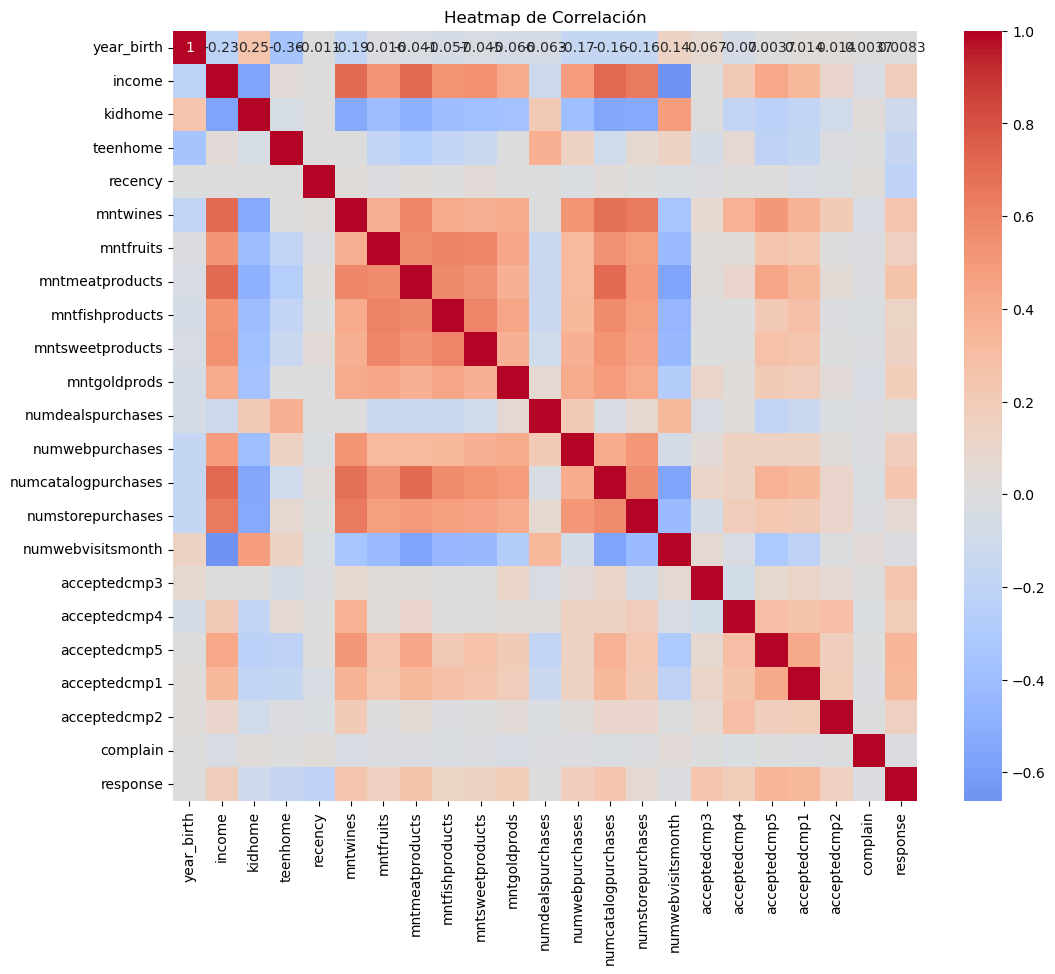

Variables con correlación por debajo del 20%: ['year_birth', 'income', 'kidhome', 'teenhome', 'mntfruits', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp4', 'acceptedcmp2', 'complain']
Variables con correlación por encima del 20%: ['recency', 'mntwines', 'mntmeatproducts', 'numcatalogpurchases', 'acceptedcmp3', 'acceptedcmp5', 'acceptedcmp1', 'response']

Prueba de correlación para year_birth vs response
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: 0.01
p-valor: 0.749
La variable year_birth no está significativamente asociada con response (p >= 0.05 o correlación < 0.2).

Prueba de correlación para income vs response
****************************************
Prueba de correlación (Pearson):
Estadístico de correlación: 0.17
p-valor: 0.000
La variable income no está significativamente asociada con response (p >= 0.05 o correlación 

{'significant_vars': ['recency',
  'mntwines',
  'mntmeatproducts',
  'numcatalogpurchases',
  'acceptedcmp3',
  'acceptedcmp5',
  'acceptedcmp1'],
 'high_vif_vars': [],
 'high_corr_vars': [],
 'low_corr_vars': []}

In [111]:
analisis_bivariable_numericas_numerica(num,target_num,features_num)

## Imputación de nuevas variables

Vuelvo a juntar los dataset

In [112]:
df = pd.merge(cat, num, how='right',right_index=True, left_index=True)

In [113]:
df['marital_status'].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'OTROS'],
      dtype=object)

Imputo nuevas variables

In [114]:
# Edad tomando como referencia 2015 para poder obtener la variables
df['age']= 2015 - df['year_birth']

# Miembros totales en casa
dicc_status = {
    'Together': 2,  # Generalmente representa a dos personas viviendo juntas
    'Divorced': 1,  # Generalmente representa a una persona que está divorciada
    'Married': 2,   # Generalmente representa a dos personas casadas
    'Single': 1,    # Generalmente representa a una persona soltera
    'Widow':1,      # Generalmente representa a una persona viuda
    'OTROS': 1      # 1 por defecto    
}

df['status_members'] = df['marital_status'].map(dicc_status)
df['household_members'] = df['status_members']+df['kidhome']+df['teenhome']

# Gasto total
df['total_amount'] = df.filter(like='mnt').sum(axis = 1)

# Nº compras totales
df['total_purchase'] = df.filter(like='purchases').sum(axis = 1)

# Gasto promedio
df['median_amount_purchase'] = np.where(
    df['total_purchase'] != 0,
    df['total_amount'] / df['total_purchase'],
    0)


# Nº ofertas aceptadas
df['total_cmp'] = df.filter(like='accepted').apply(pd.to_numeric, errors='coerce').sum(axis=1)

# % de ofertas aceptadas
train_set_numeric = df.filter(like='cmp').apply(pd.to_numeric, errors='coerce')
df['total_%_cmp'] = df['total_cmp'] / len(train_set_numeric.columns)

# Elimino columnas intermedias y las que no aportan
df = df.drop(columns=['status_members', 'year_birth'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1481 entries, 1640 to 4297
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   education               1481 non-null   object 
 1   marital_status          1481 non-null   object 
 2   income                  1481 non-null   float64
 3   kidhome                 1481 non-null   int64  
 4   teenhome                1481 non-null   int64  
 5   recency                 1481 non-null   int64  
 6   mntwines                1481 non-null   int64  
 7   mntfruits               1481 non-null   int64  
 8   mntmeatproducts         1481 non-null   int64  
 9   mntfishproducts         1481 non-null   int64  
 10  mntsweetproducts        1481 non-null   int64  
 11  mntgoldprods            1481 non-null   int64  
 12  numdealspurchases       1481 non-null   int64  
 13  numwebpurchases         1481 non-null   int64  
 14  numcatalogpurchases     1481 non-null   in

Divido de nuevo

In [116]:
cat = df.select_dtypes(exclude = 'number').copy()
num = df.select_dtypes(include = 'number').copy()

In [117]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
income,1481.0,51570.927346,51012.0,20937.919821,7500.000000,34961.0,51012.0,67506.000000,110428.800000
kidhome,1481.0,0.461175,0.0,0.539029,0.000000,0.0,0.0,1.000000,2.000000
teenhome,1481.0,0.499662,0.0,0.545405,0.000000,0.0,0.0,1.000000,2.000000
recency,1481.0,48.339635,49.0,28.896228,0.000000,23.0,49.0,73.000000,99.000000
mntwines,1481.0,298.419311,163.0,338.462574,1.000000,22.0,163.0,493.000000,1388.000000
mntfruits,1481.0,26.252532,8.0,39.681498,0.000000,1.0,8.0,33.000000,180.000000
mntmeatproducts,1481.0,167.819716,64.0,224.498478,2.000000,15.0,64.0,231.000000,965.000000
mntfishproducts,1481.0,37.183660,12.0,54.096548,0.000000,3.0,12.0,49.000000,240.000000
mntsweetproducts,1481.0,26.929102,8.0,40.725992,0.000000,1.0,8.0,34.000000,191.000000
mntgoldprods,1481.0,43.586090,25.0,51.141822,0.000000,8.0,25.0,56.000000,242.000000


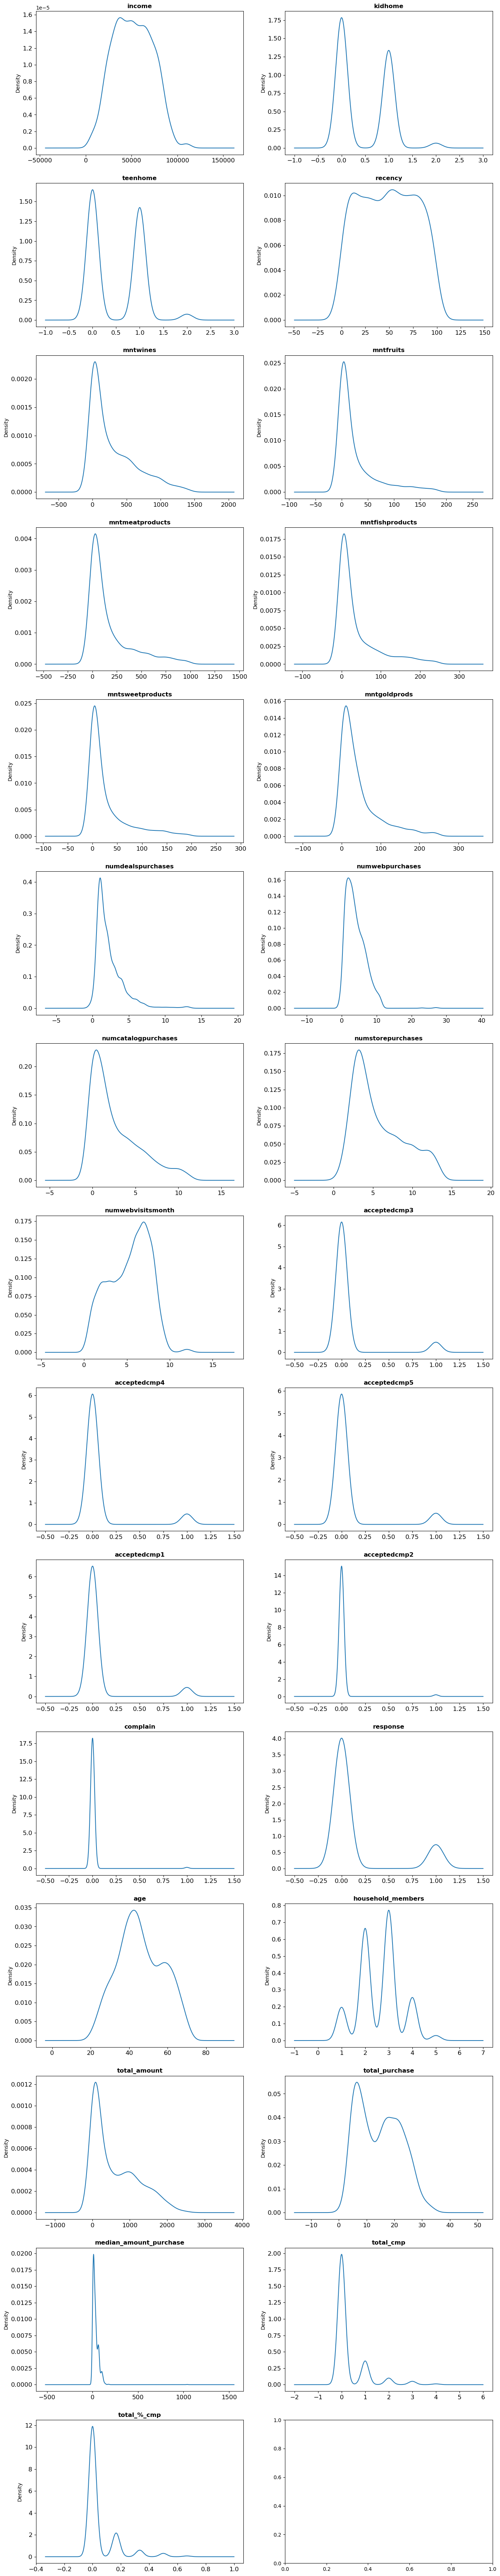

In [118]:
graficos_eda_continuas(num)

In [119]:
variables_select_visual = ['recency',
  'mntwines',
  'mntmeatproducts',
  'numcatalogpurchases',
  'acceptedcmp3',
  'acceptedcmp5',
  'acceptedcmp1']
df_variables_visual = df[variables_select_visual]

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [120]:
#Definir los nombres de los archivos
ruta_df = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'df_resultado_eda.pickle'
ruta_df_var_visual = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'df_var_visual.pickle'
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [121]:
#Guardar los archivos
df.to_pickle(ruta_df)
df_variables_visual.to_pickle(ruta_df_var_visual)
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)